# Missing Values Analysis
Are there any patterns in missing responses? What is the optimal way of imputing the values in surveys?

Note that a missing response indicates that the student chose not to answer that particular survey question.

In [1]:
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import r_regression

plt.style.use("fivethirtyeight")
FIGSIZE = (16, 6)

In [2]:
# Import raw data instead of processed one.
path = "../data/responses.csv"
df = pd.read_csv(path, header=0)

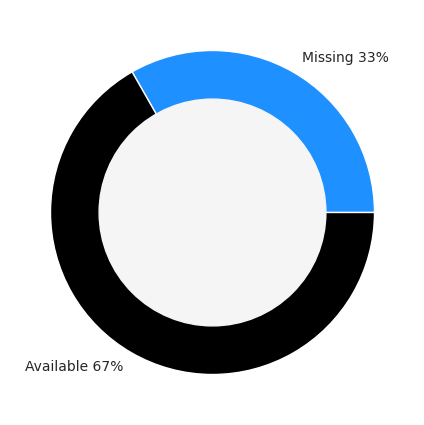

In [18]:
fig = plt.figure(figsize=(5,5))

missing = df[df.isnull().any(axis=1)].shape[0]
available = len(df) - missing

# Create a pieplot
plt.pie(
    [missing, available],
    labels=[f"Missing {100 * missing / len(df):.0f}%", f"Available {100 * available / len(df):.0f}%"],
    colors=["dodgerblue", "black"],
    textprops={'fontsize': 10}
)
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color="whitesmoke")
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

One third of the data has at least one instance missing!

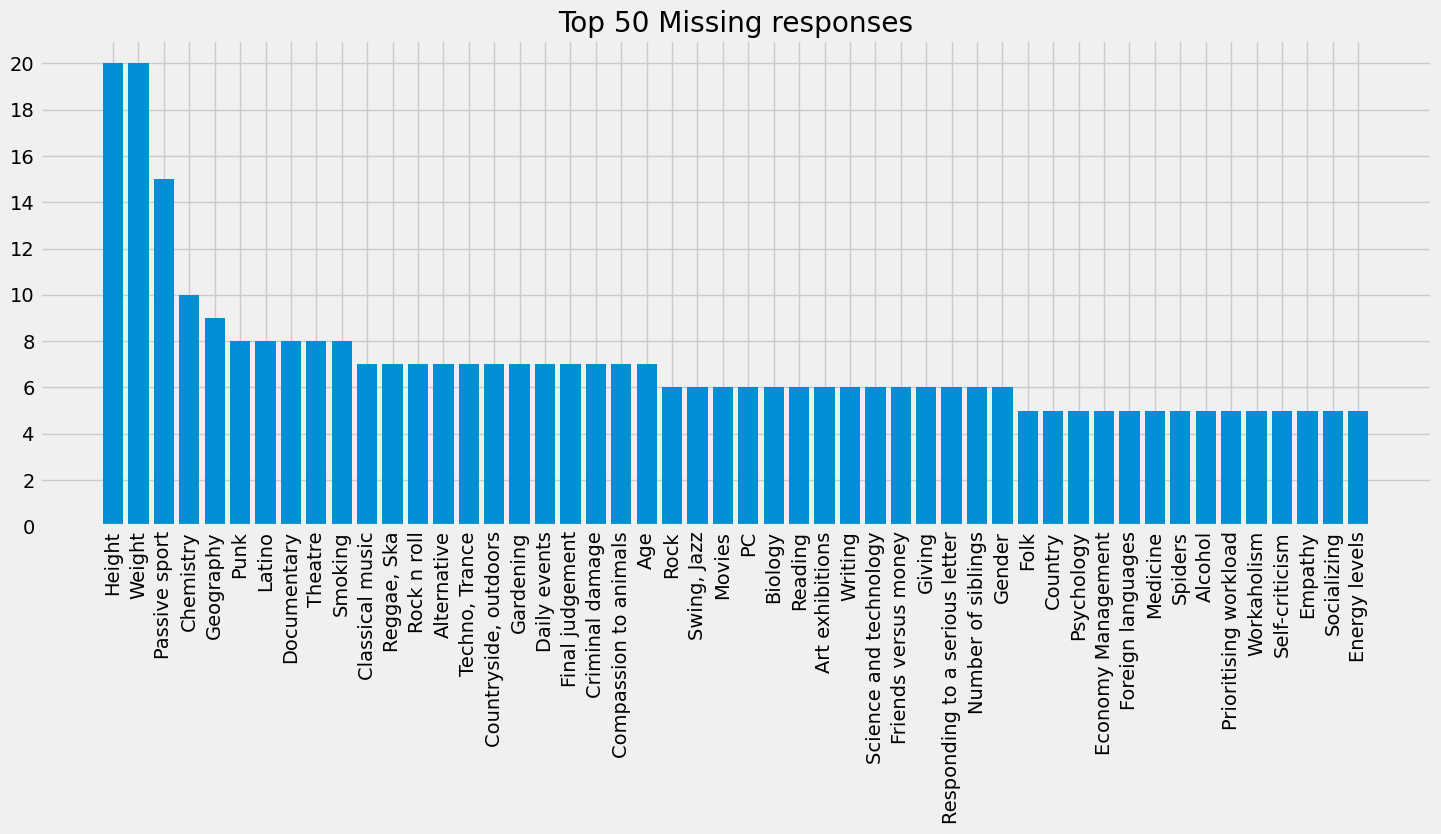

In [3]:
missing_data_counts = []
for col in df.columns:
    df_na = df[df[col].isna()]
    missing_data_counts.append(len(df_na))

cols = [c for c, __ in sorted(zip(df.columns, missing_data_counts), key=lambda pair: pair[1], reverse=True)]
missing_data_counts = sorted(missing_data_counts, reverse=True)

top_k = 50
plt.figure(figsize=FIGSIZE)
plt.title(f"Top {top_k} Missing responses")
plt.bar(cols[:top_k], missing_data_counts[:top_k])
plt.xticks(cols[:top_k], rotation=90)
plt.yticks(range(0, int(max(missing_data_counts)) + 2, 2))
plt.show()

However, of the 1010 instances, the maximum missing values from a single attribute are only 20.

Let's check if there's a correlation between unanswered questions. We're trying to answer, whether people who did not answer Q1 did not answer Q2 as well.

In [4]:
df_na = df.isna()
top_k = 20
top_k_cols = cols[:top_k]
heatmap = np.empty(shape=(top_k, top_k))

for i, col in enumerate(top_k_cols):
    # compute the correlation of top_k_cols with the selected column.
    corr_coeff = r_regression(df_na[top_k_cols], df_na[col])
    heatmap[i, :] = corr_coeff

mask = np.triu(np.ones_like(heatmap, dtype=bool))

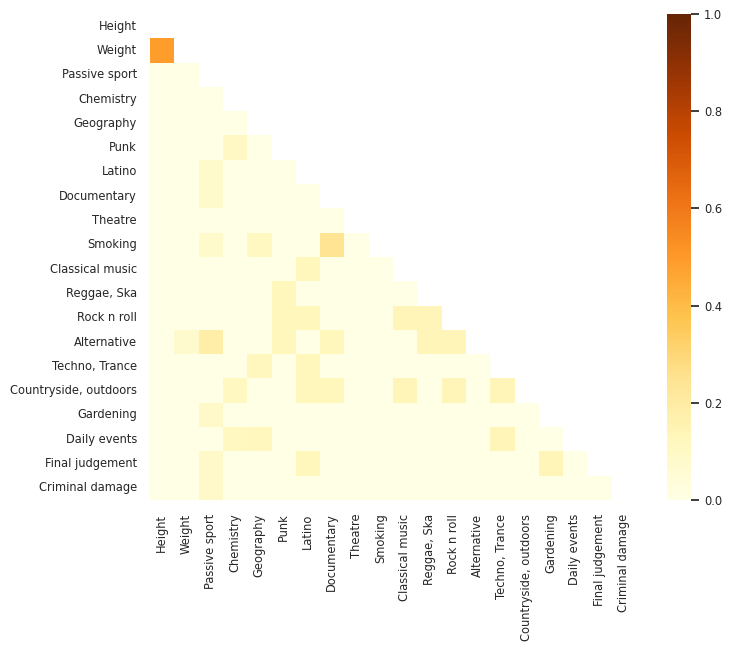

In [10]:
plt.figure(figsize=(7,6))
sns.set(style="white", font_scale=0.75)
sns.heatmap(
    heatmap,
    vmax=1,
    vmin=0,
    xticklabels=top_k_cols,
    yticklabels=top_k_cols,
    cmap="YlOrBr",
    square=True,
    mask=mask
)
plt.grid(False)
plt.show()

- The strongest correlation is between weight and height, which indicates the presence of body-conscious participants.
- Other correlations don't seem that interesting.